### Success of Client Subscription to Bank Deposit 

This analysis tries to describe an implementation of a DM project based on the CRISP-DM methodology. Real-world data were collected from a Portuguese marketing campaign related with bank deposit subscription. The business goal is to find a model that can explain success of a contact. example, if the client subscribes the deposit. Such model can increase campaign efficiency by identifying the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.ustomers.

### Contents:  
1. Understand the Data  
2. Import Necessary Libraries   
3. Read In and Explore the Data   
4. Data Analysis   
5. Data Visualization   
6. Cleaning Data  
7. Baseline Model     
8. Choosing the Best Model - Model Comparison   
9. Scoring and Improving the Model  
10. Providing Best Business Recommendations  
11. Applying CRISP-DM Process Model Across te Analysis


## 1) Understanding the Data

To gain a better understanding of the dat we areagoing to include allhe information provided in the UCI lisve, and examinexclusively e the **Materials and Methods** section of the pap.  We have identified 17 marketing campaigns that this data has represented.t?

## 2) Import Necessary Libraries
First off, we need to import several Python libraries such as numpy, pandas, matplotlib and seaborn


In [156]:
#data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 3) Read in and Explore the Data
It's time to read in ou bank-additional-fullg data using `pd.read_csv`, and take a first look atit bya using the `describe()` function.

In [157]:
#import bank-additional-full CSV file
df = pd.read_csv('/home/9e0e5292-28dd-4863-80e5-827ea4a5d78c/prac_app_3/bank-additional-full.csv', sep = ';')

#take a look at the training data
df.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


#### Some Observations:
* There are a total of 41,188 contacts in our dataset
.

## 4) Data Analysis
We're going to consider the features in the dataset and how complete they are.

In [158]:
#get a list of the features within the dataset
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


#### What are the data types for each feature?
* **Numerical Features:** Age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed  
* **Categorical Features:** job, martial, education, default, housing, loan, contact, month, day_of_the_week, poutcome, y  
* **Desired Target:** y - has the client subscribed a term deposit? (binary: 'yes','no')

Now that we have an idea of what kinds of features we're working with, we can see how much information we have about each of hem.


In [159]:
#see a sample of the dataset to get an idea of the variables
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6775,37,admin.,single,university.degree,no,no,no,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10647,38,blue-collar,married,professional.course,no,no,no,telephone,jun,tue,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
27781,32,management,single,university.degree,no,yes,no,cellular,mar,tue,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.687,5099.1,yes
29838,46,services,divorced,high.school,unknown,yes,no,cellular,apr,mon,...,2,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
1779,56,blue-collar,married,basic.6y,unknown,no,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [160]:
#checking for any other unusable values
print(pd.isnull(df).sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [161]:
df.isnull().sum().sum()

0

In [162]:
df[df.isnull().any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


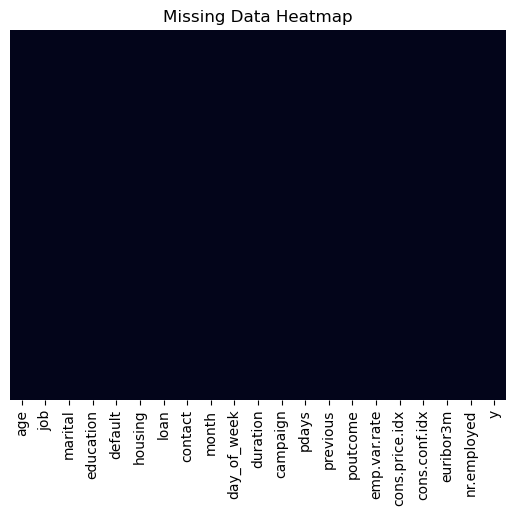

In [163]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

We can see that no NaN values exist.

### Some Predictions:  
* Martial :Single clienss are more likely to subscribe to the bank deposit.  
* Education: People wh it highnoer education are more likely to subscribe.  
* Age: People with youngeres  agor older seniors es are more likely to subscribe.  
* Job: People of lower socioeconomic jobs are more likely to subscribe.


## 5) Data Visualization
It's time to visualize our data so we can see whether our predictions were accurate!


### Marital Feature

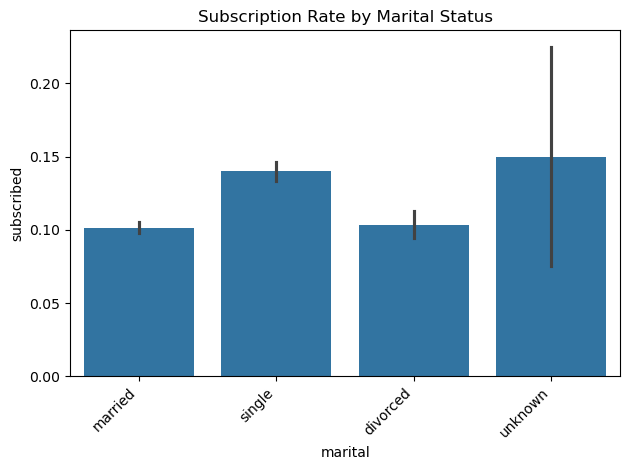

Percentage of single cliets subscribed: 14.004149377593361
Percentage of married cliets subscribed: 10.157252888318355
Percentage of divorced cliets subscribed: 10.320901994796184


In [164]:
#convert y feature to binary and rename it to 'subscribed'
df['subscribed'] = df['y'].map({'no': 0, 'yes': 1})

#draw a bar plot of clients subscribed by martial status
sns.barplot(x="marital", y="subscribed", data=df)

plt.xticks(rotation=45, ha='right')
plt.title("Subscription Rate by Marital Status")
plt.tight_layout()
plt.show()

#print percentages of single clients vs. married vs. divorced that subscribed
print("Percentage of single cliets subscribed:", df["subscribed"][df["marital"] == 'single'].value_counts(normalize = True)[1]*100)

print("Percentage of married cliets subscribed:", df["subscribed"][df["marital"] == 'married'].value_counts(normalize = True)[1]*100)

print("Percentage of divorced cliets subscribed:", df["subscribed"][df["marital"] == 'divorced'].value_counts(normalize = True)[1]*100)

As predicted, single clients have a much higher chance of subscription than married or divorced. The marital feature is essential in our predictions.

### Education Feature

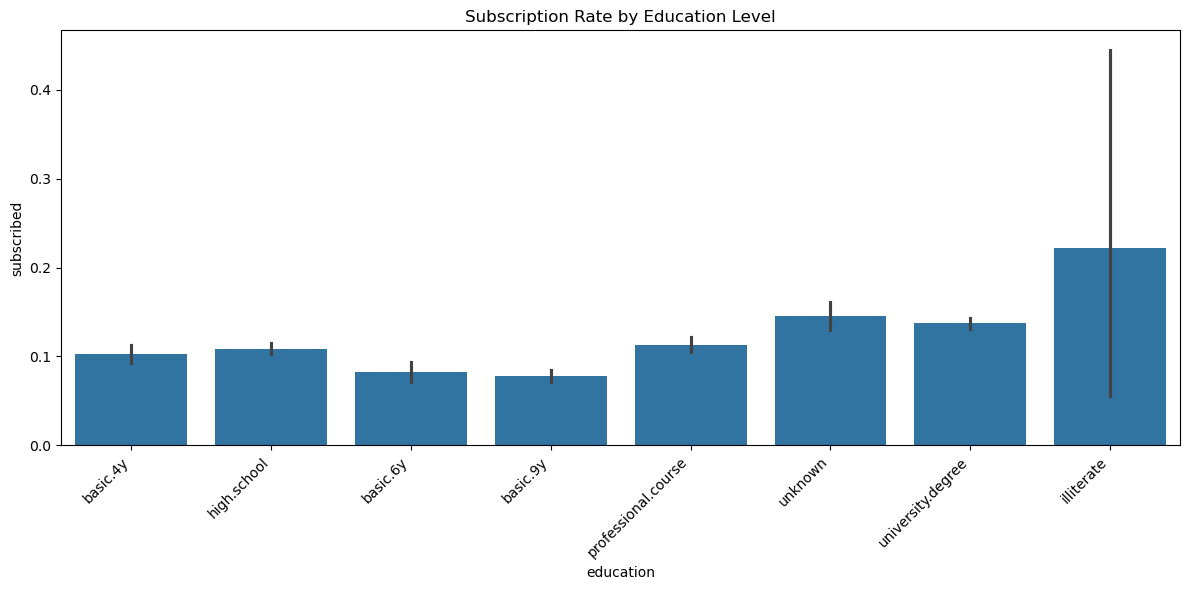

Percentage of education with high school degree cliets subscribed: 10.835522858644246
Percentage of education with university degree cliets subscribed: 13.724523339907954
Percentage of education with high basic 9y degree cliets subscribed: 7.82464846980976
Percentage of no education and illiterate degree cliets subscribed: 22.22222222222222


In [165]:
# Set figure size to make it wide to be able to see without overlaps of columns names (12 inches wide, 6 inches tall)
plt.figure(figsize=(12, 6))

#draw a bar plot of clients subscribed by martial status
sns.barplot(x="education", y="subscribed", data=df)

plt.xticks(rotation=45, ha='right')
plt.title("Subscription Rate by Education Level")
plt.tight_layout()
plt.show()

#print percentages of educational level high school clients vs. university vs. 9y degree vs. illiterate clients that subscribed
print("Percentage of education with high school degree cliets subscribed:", df["subscribed"][df["education"] == 'high.school'].value_counts(normalize = True)[1]*100)

print("Percentage of education with university degree cliets subscribed:", df["subscribed"][df["education"] == 'university.degree'].value_counts(normalize = True)[1]*100)

print("Percentage of education with high basic 9y degree cliets subscribed:", df["subscribed"][df["education"] == 'basic.9y'].value_counts(normalize = True)[1]*100)

print("Percentage of no education and illiterate degree cliets subscribed:", df["subscribed"][df["education"] == 'illiterate'].value_counts(normalize = True)[1]*100)

As predicted, clients with no educational degree are more likely to subscribe deposits 

### Age Feature

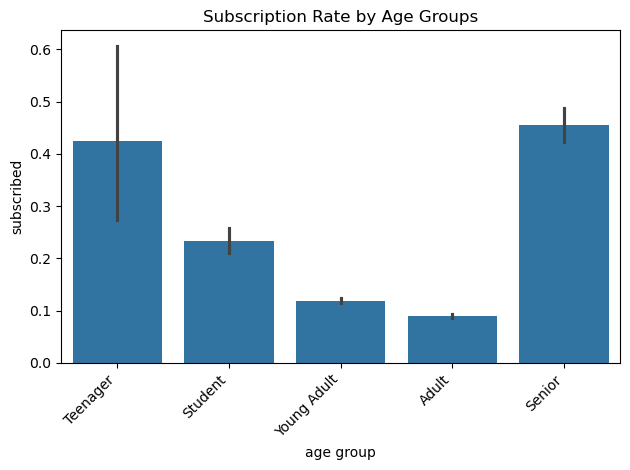

Percentage of age group equal to teenagers clients subscribed: 42.42424242424242
Percentage of age group equal to seniors clients subscribed: 45.494505494505496
Percentage of age group equal to students clients subscribed: 23.381642512077295
Percentage of age group equal to adults clients subscribed: 8.992215442878182


In [166]:
#convert y feature to binary and rename it to 'subscribed'
df['subscribed'] = df['y'].map({'no': 0, 'yes': 1})

#sort the ages into logical categories
df["age"] = df["age"].fillna(-0.5)
bins = [12, 18, 24, 35, 60, np.inf]
labels = ['Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df['age group'] = pd.cut(df["age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="age group", y="subscribed", data=df)
plt.xticks(rotation=45, ha='right')
plt.title("Subscription Rate by Age Groups")
plt.tight_layout()
plt.show()

#print percentages of age groups teenagers vs. seniors vs. students vs. adults that subscribed
print("Percentage of age group equal to teenagers clients subscribed:", 
      df[df["age group"] == 'Teenager']["subscribed"].mean() * 100)

print("Percentage of age group equal to seniors clients subscribed:", 
      df[df["age group"] == 'Senior']["subscribed"].mean() * 100)

print("Percentage of age group equal to students clients subscribed:", 
      df[df["age group"] == 'Student']["subscribed"].mean() * 100)

print("Percentage of age group equal to adults clients subscribed:", 
      df[df["age group"] == 'Adult']["subscribed"].mean() * 100)

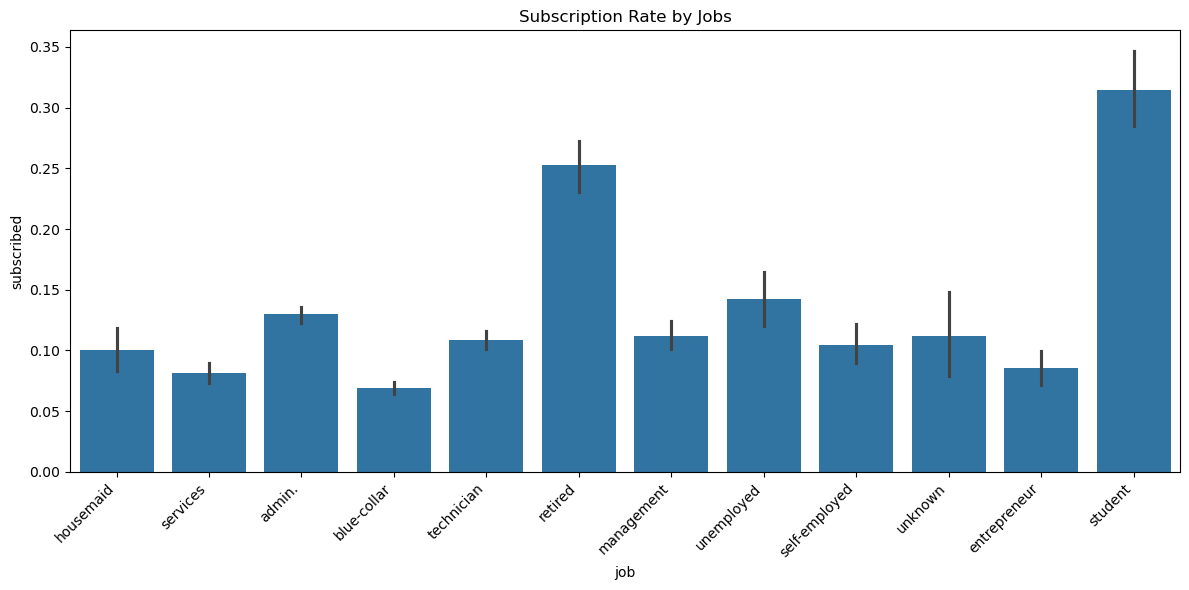

Percentage of cliets subscribed identified with job as blue-collar: 6.894315971471795
Percentage of cliets subscribed identified with job as admin: 12.972558050278257
Percentage of cliets subscribed identified with job as services: 8.138070042831949
Percentage of cliets subscribed identified with job as students: 31.428571428571427
Percentage of cliets subscribed identified with job as retired: 25.232558139534884


In [167]:
# Set figure size to make it wide to be able to see without overlaps of columns names (12 inches wide, 6 inches tall)
plt.figure(figsize=(12, 6))

#draw a bar plot of clients subscribed by martial status
sns.barplot(x="job", y="subscribed", data=df)

plt.xticks(rotation=45, ha='right')
plt.title("Subscription Rate by Jobs")
plt.tight_layout()
plt.show()

#print percentages of job titles with blue-collar clients vs. admins vs. jobs in services that subscribed
print("Percentage of cliets subscribed identified with job as blue-collar:", df["subscribed"][df["job"] == 'blue-collar'].value_counts(normalize = True)[1]*100)

print("Percentage of cliets subscribed identified with job as admin:", df["subscribed"][df["job"] == 'admin.'].value_counts(normalize = True)[1]*100)

print("Percentage of cliets subscribed identified with job as services:", df["subscribed"][df["job"] == 'services'].value_counts(normalize = True)[1]*100)

print("Percentage of cliets subscribed identified with job as students:", df["subscribed"][df["job"] == 'student'].value_counts(normalize = True)[1]*100)

print("Percentage of cliets subscribed identified with job as retired:", df["subscribed"][df["job"] == 'retired'].value_counts(normalize = True)[1]*100)

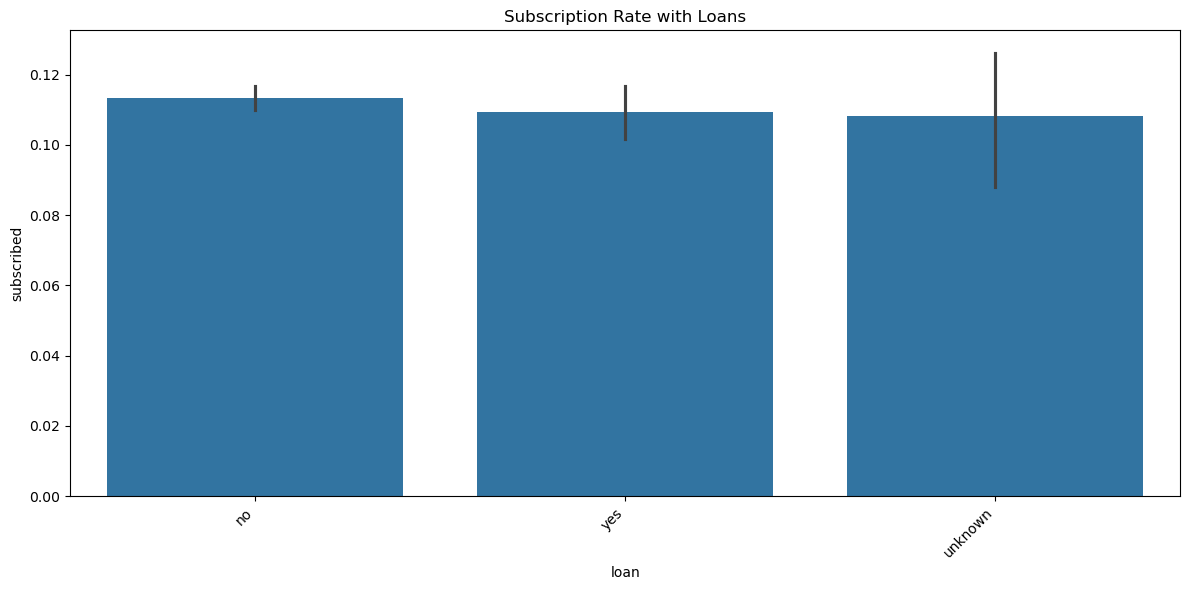

In [168]:
# Set figure size to make it wide to be able to see without overlaps of columns names (12 inches wide, 6 inches tall)
plt.figure(figsize=(12, 6))

#draw a bar plot of clients subscribed by loans status
sns.barplot(x="loan", y="subscribed", data=df)

plt.xticks(rotation=45, ha='right')
plt.title("Subscription Rate with Loans")
plt.tight_layout()
plt.show()

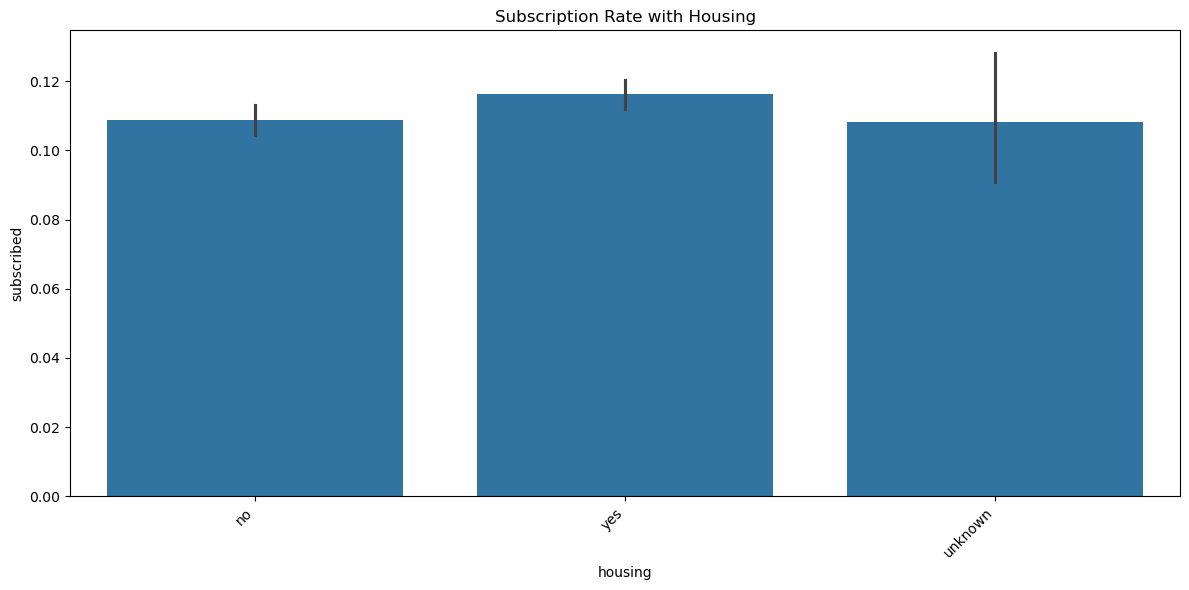

In [169]:
# Set figure size to make it wide to be able to see without overlaps of columns names (12 inches wide, 6 inches tall)
plt.figure(figsize=(12, 6))

#draw a bar plot of clients subscribed by housing status
sns.barplot(x="housing", y="subscribed", data=df)

plt.xticks(rotation=45, ha='right')
plt.title("Subscription Rate with Housing")
plt.tight_layout()
plt.show()

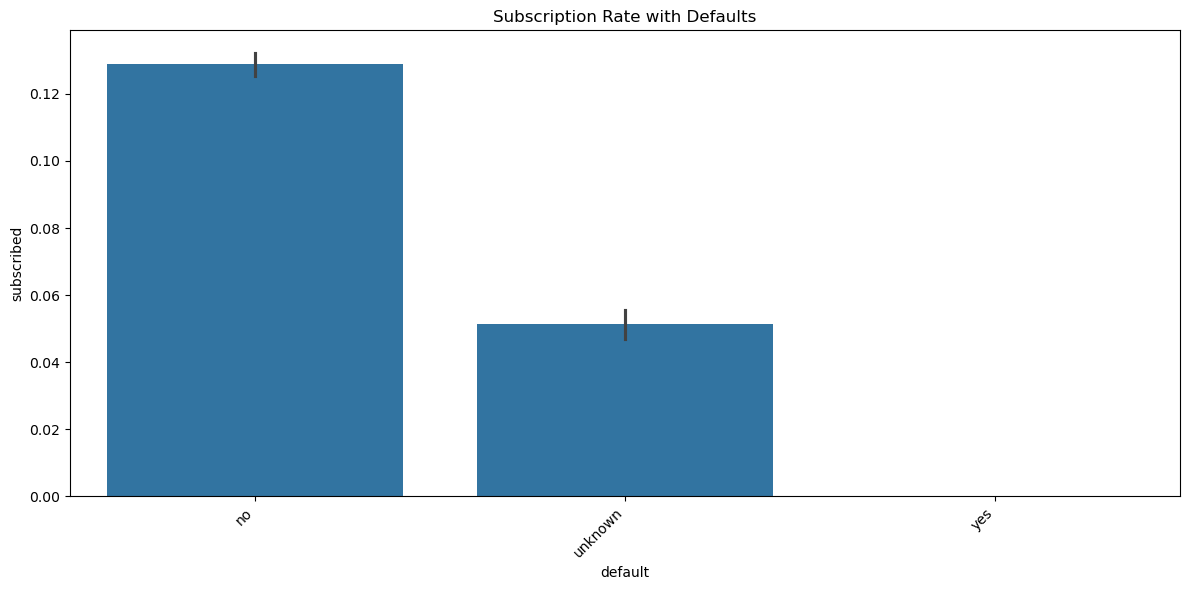

In [170]:
# Set figure size to make it wide to be able to see without overlaps of columns names (12 inches wide, 6 inches tall)
plt.figure(figsize=(12, 6))

#draw a bar plot of clients subscribed with default status
sns.barplot(x="default", y="subscribed", data=df)

plt.xticks(rotation=45, ha='right')
plt.title("Subscription Rate with Defaults")
plt.tight_layout()
plt.show()

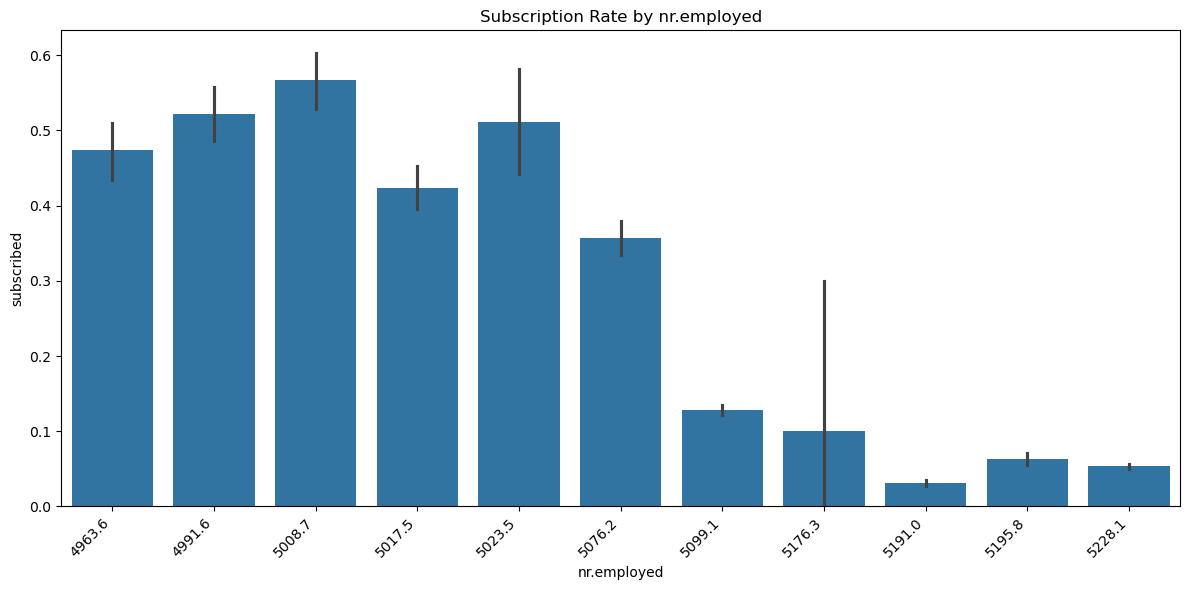

In [171]:
# Set figure size to make it wide to be able to see without overlaps of columns names (12 inches wide, 6 inches tall)
plt.figure(figsize=(12, 6))

#draw a bar plot of clients subscribed by nr.employed status
sns.barplot(x="nr.employed", y="subscribed", data=df)

plt.xticks(rotation=45, ha='right')
plt.title("Subscription Rate by nr.employed")
plt.tight_layout()
plt.show()

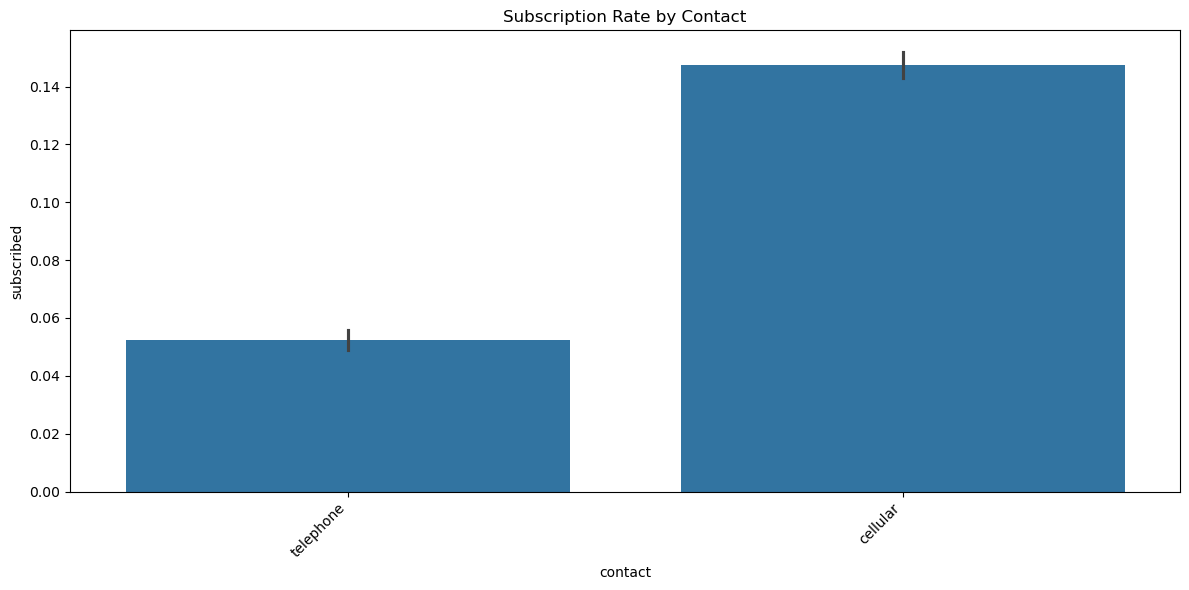

In [172]:
# Set figure size to make it wide to be able to see without overlaps of columns names (12 inches wide, 6 inches tall)
plt.figure(figsize=(12, 6))

#draw a bar plot of clients subscribed by contact status
sns.barplot(x="contact", y="subscribed", data=df)

plt.xticks(rotation=45, ha='right')
plt.title("Subscription Rate by Contact")
plt.tight_layout()
plt.show()

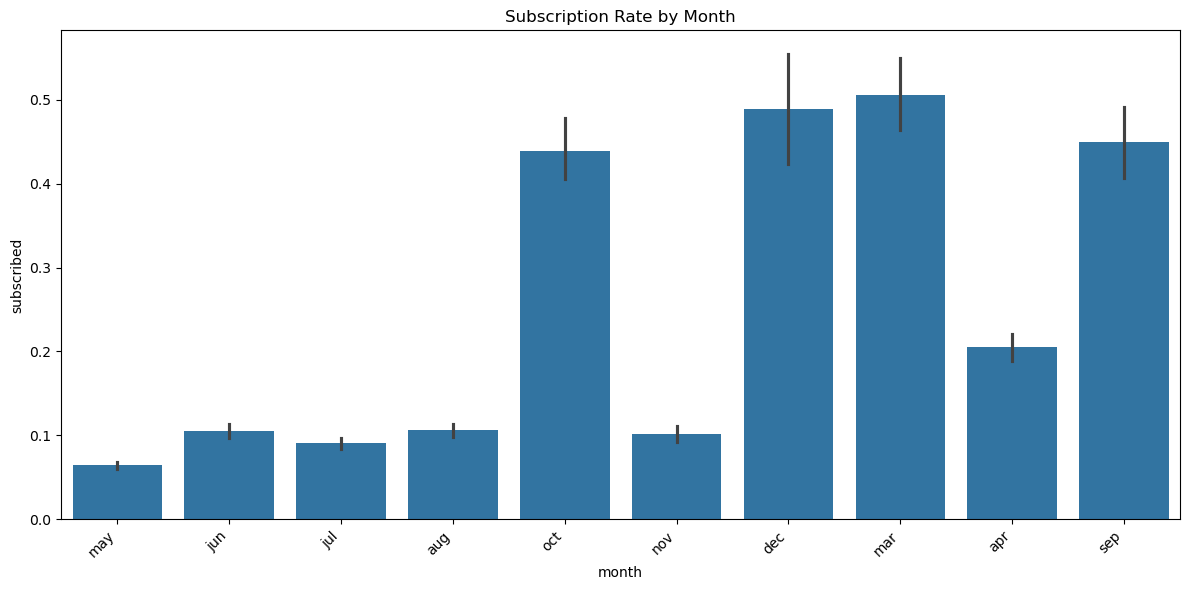

In [173]:
# Set figure size to make it wide to be able to see without overlaps of columns names (12 inches wide, 6 inches tall)
plt.figure(figsize=(12, 6))

#draw a bar plot of clients subscribed by month status
sns.barplot(x="month", y="subscribed", data=df)

plt.xticks(rotation=45, ha='right')
plt.title("Subscription Rate by Month")
plt.tight_layout()
plt.show()

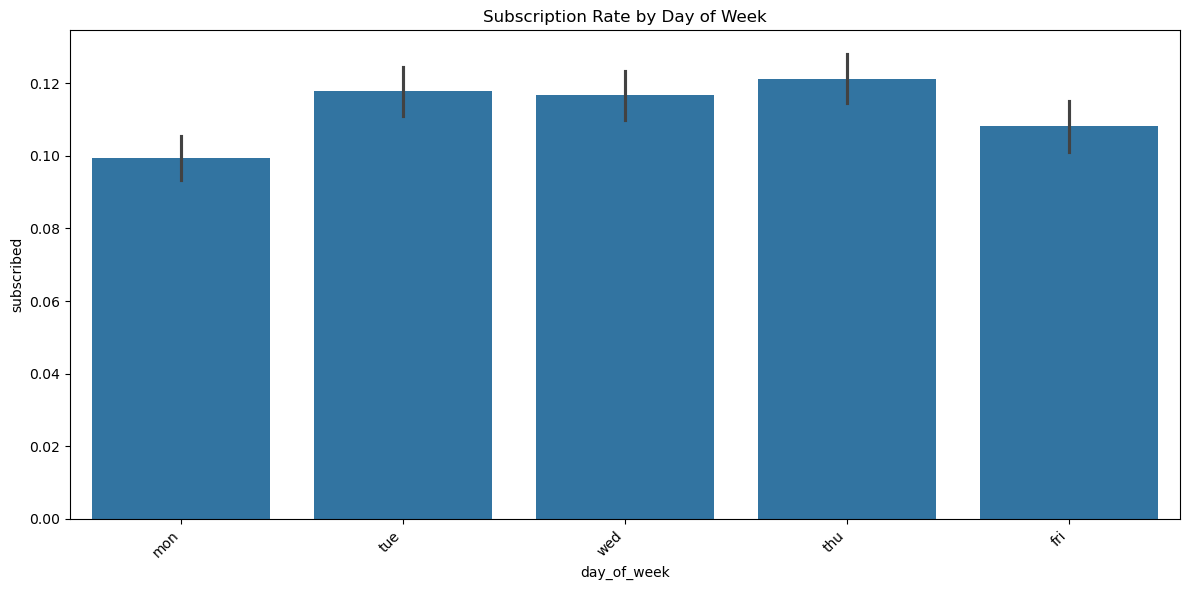

In [174]:
# Set figure size to make it wide to be able to see without overlaps of columns names (12 inches wide, 6 inches tall)
plt.figure(figsize=(12, 6))

#draw a bar plot of clients subscribed by day of week status
sns.barplot(x="day_of_week", y="subscribed", data=df)

plt.xticks(rotation=45, ha='right')
plt.title("Subscription Rate by Day of Week")
plt.tight_layout()
plt.show()

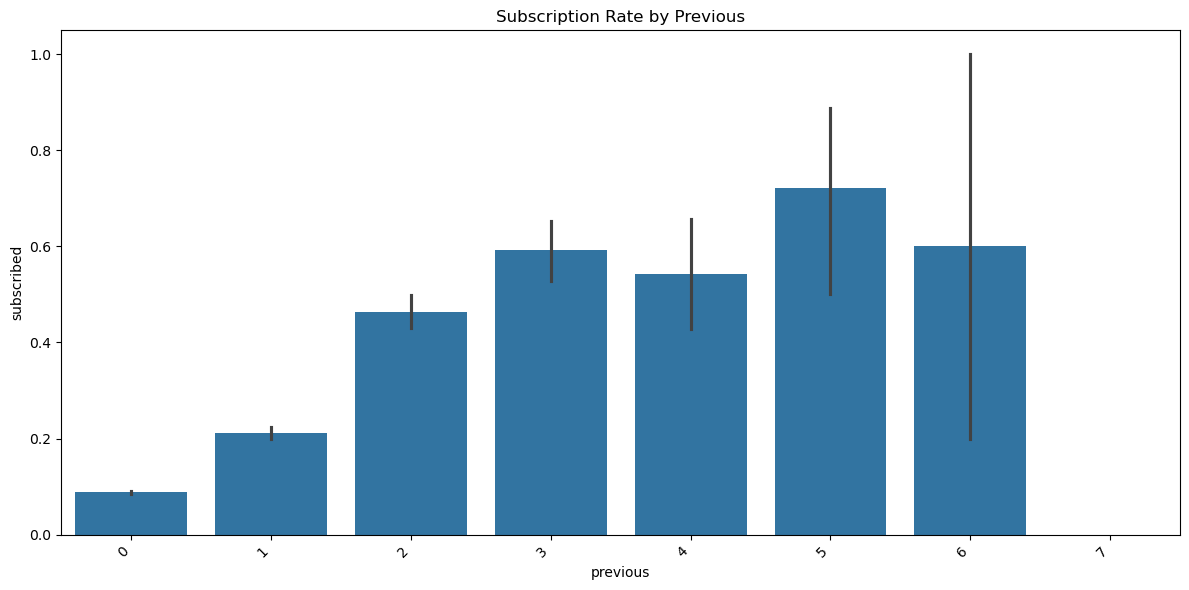

In [175]:
# Set figure size to make it wide to be able to see without overlaps of columns names (12 inches wide, 6 inches tall)
plt.figure(figsize=(12, 6))

#draw a bar plot of clients subscribed by previous status
sns.barplot(x="previous", y="subscribed", data=df)

plt.xticks(rotation=45, ha='right')
plt.title("Subscription Rate by Previous")
plt.tight_layout()
plt.show()

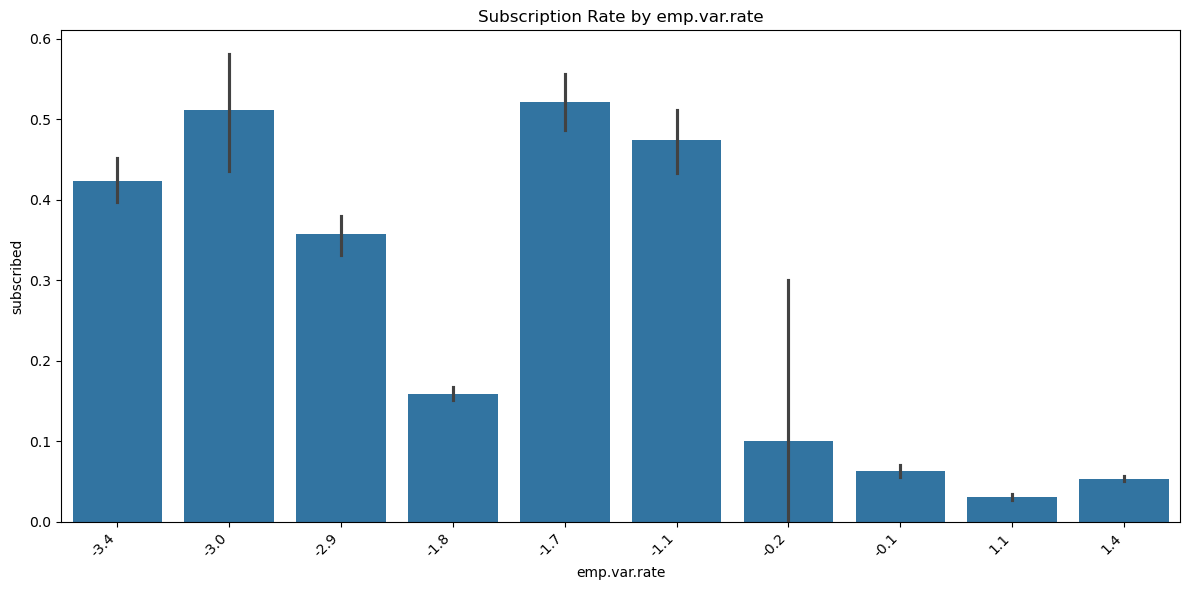

In [176]:
# Set figure size to make it wide to be able to see without overlaps of columns names (12 inches wide, 6 inches tall)
plt.figure(figsize=(12, 6))

#draw a bar plot of clients subscribed byemp.var.rate status
sns.barplot(x="emp.var.rate", y="subscribed", data=df)

plt.xticks(rotation=45, ha='right')
plt.title("Subscription Rate by emp.var.rate")
plt.tight_layout()
plt.show()

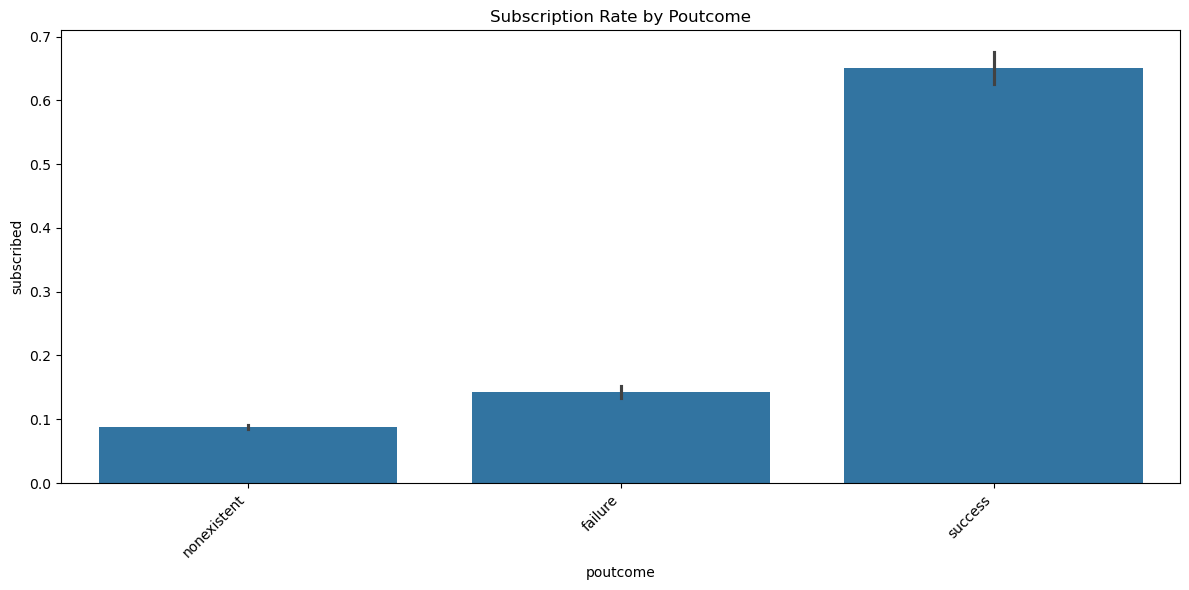

In [177]:
# Set figure size to make it wide to be able to see without overlaps of columns names (12 inches wide, 6 inches tall)
plt.figure(figsize=(12, 6))

#draw a bar plot of clients subscribed by poutcome status
sns.barplot(x="poutcome", y="subscribed", data=df)

plt.xticks(rotation=45, ha='right')
plt.title("Subscription Rate by Poutcome")
plt.tight_layout()
plt.show()

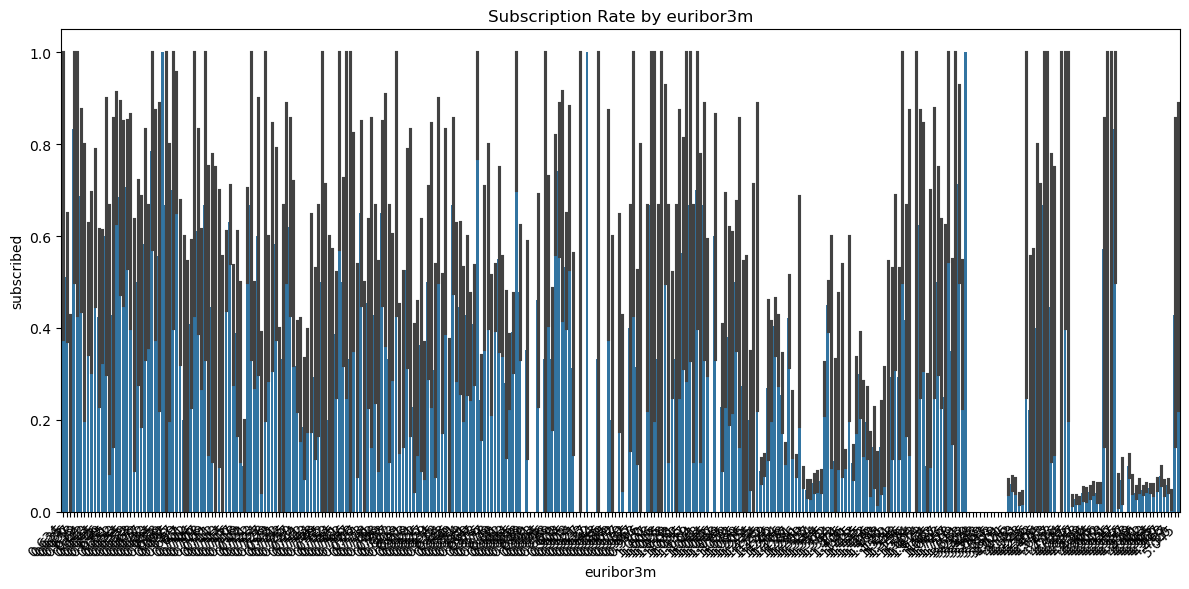

In [178]:
# Set figure size to make it wide to be able to see without overlaps of columns names (12 inches wide, 6 inches tall)
plt.figure(figsize=(12, 6))

#draw a bar plot of clients subscribed by euribor3m status
sns.barplot(x="euribor3m", y="subscribed", data=df)

plt.xticks(rotation=45, ha='right')
plt.title("Subscription Rate by euribor3m")
plt.tight_layout()
plt.show()

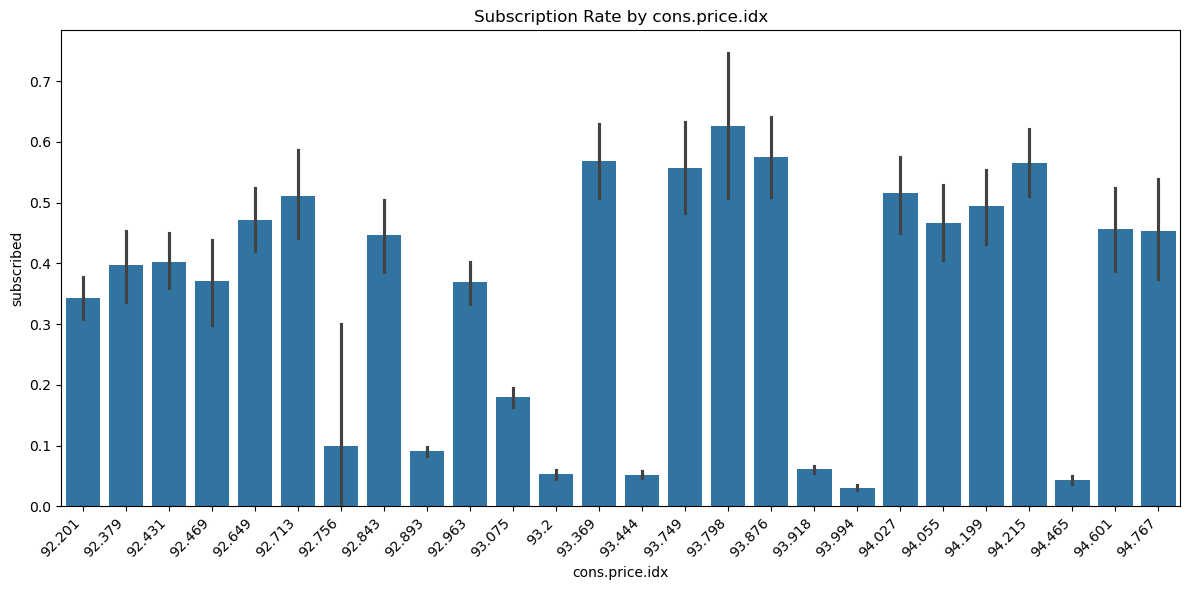

In [179]:
# Set figure size to make it wide to be able to see without overlaps of columns names (12 inches wide, 6 inches tall)
plt.figure(figsize=(12, 6))

#draw a bar plot of clients subscribed by cons.price.idx status
sns.barplot(x="cons.price.idx", y="subscribed", data=df)

plt.xticks(rotation=45, ha='right')
plt.title("Subscription Rate by cons.price.idx")
plt.tight_layout()
plt.show()

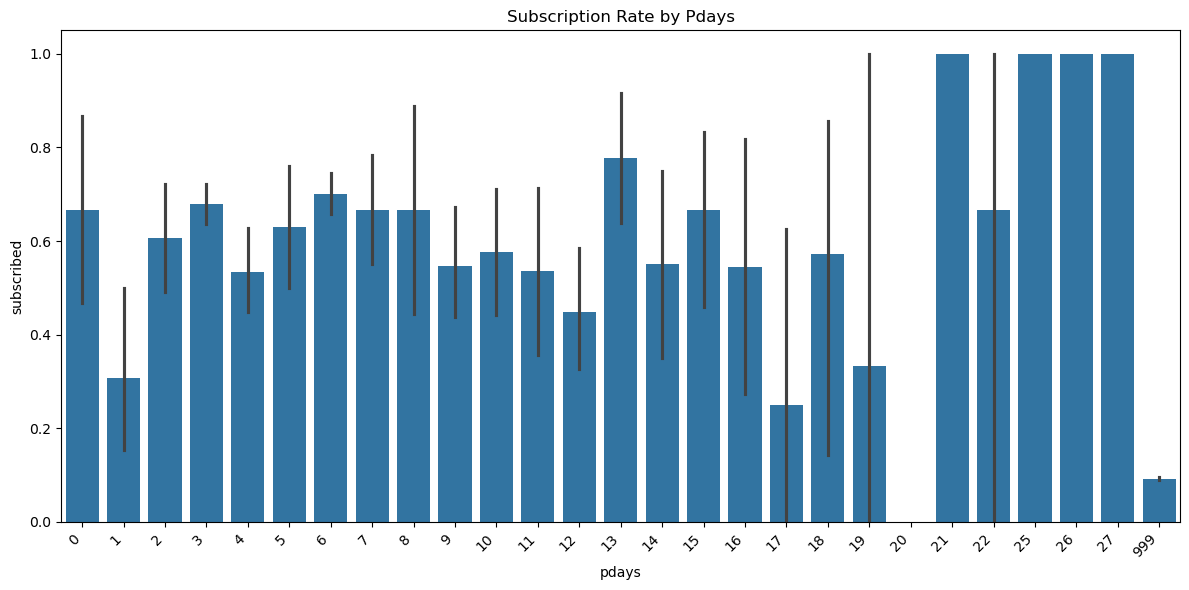

In [180]:
# Set figure size to make it wide to be able to see without overlaps of columns names (12 inches wide, 6 inches tall)
plt.figure(figsize=(12, 6))

#draw a bar plot of clients subscribed by pdays status
sns.barplot(x="pdays", y="subscribed", data=df)

plt.xticks(rotation=45, ha='right')
plt.title("Subscription Rate by Pdays")
plt.tight_layout()
plt.show()

People with job title as retired or students are more likely to have higher subscription rates compared to the rest. Whereas, entrepreneurs and blue-collars are among the lowest.

## 6) Cleaning Data
Time to clean our data to account for missing values and unnecessary information!

In [181]:
df.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,subscribed,age group
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,3,NaN,NaN,NaN,NaN,NaN,2,NaN,5
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no,NaN,Adult
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548,NaN,23765
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN,0.112654,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN,0.316173,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN,0.000000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN,0.000000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN,0.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN,0.000000,NaN


* We have a total of 41,188 records.  
* No values from any feature is missing
* Dropping y since we have created the numeric version of it with subscribed.


In [182]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,subscribed,age group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,Adult
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,Adult
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,Adult


### DROPPING THE FOLLOWING: cons.price.idx, euribor3m, emp.var.rate, previous, pdays, day_of_week, nr.employed Features

In [183]:
#we can drop all the above mentioned features since they're unlikely to yield any useful information
df = df.drop(['cons.price.idx'], axis = 1)
df = df.drop(['euribor3m'], axis = 1)
df = df.drop(['emp.var.rate'], axis = 1)
df = df.drop(['previous'], axis = 1)
df = df.drop(['pdays'], axis = 1)
df = df.drop(['day_of_week'], axis = 1)
df = df.drop(['nr.employed'], axis = 1)
df = df.drop(['cons.conf.idx'], axis = 1)

In [184]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,poutcome,y,subscribed,age group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,nonexistent,no,0,Adult
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,nonexistent,no,0,Adult
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,nonexistent,no,0,Adult


In [185]:
# Replace specific job titles with "employed"
df['job'] = df['job'].replace(
    ['services', 'admin.', 'blue-collar', 'technician', 'management', 
     'entrepreneur', 'self-employed', 'housemaid'], 
    'employed'
)

# Group and get mean subscription rate per job
df[['job', 'subscribed']].groupby(['job'], as_index=False).mean()

,job,subscribed
0,employed,0.100674
1,retired,0.252326
2,student,0.314286
3,unemployed,0.142012
4,unknown,0.112121


In [186]:
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,poutcome,y,subscribed,age group
0,56,employed,married,basic.4y,no,no,no,telephone,may,261,1,nonexistent,no,0,Adult


## job Feature to job_numeric

In [187]:
#map each of the job title groups to a numerical value
title_mapping = {"employed": 1, "retired": 2, "student": 3, "unemployed": 4, "unknown": 5}
# Apply mapping & fill nulls
df['job_numeric'] = df['job'].map(title_mapping).fillna(0)

In [188]:
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,poutcome,y,subscribed,age group,job_numeric
0,56,employed,married,basic.4y,no,no,no,telephone,may,261,1,nonexistent,no,0,Adult,1


## marital Feature to marital_numeric

In [189]:
#map each of the marital status groups to a numerical value
marital_mapping = {"married": 1, "single": 2, "divorced": 3, "unknown": 4}
# Apply mapping & fill nulls
df['marital_numeric'] = df['marital'].map(marital_mapping).fillna(0)
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,poutcome,y,subscribed,age group,job_numeric,marital_numeric
0,56,employed,married,basic.4y,no,no,no,telephone,may,261,1,nonexistent,no,0,Adult,1,1


## education Feature to education_numeric

In [190]:
# Replace specific job titles with "employed"
df['education'] = df['education'].replace(
    ['basic.4y', 'basic.6y', 'basic.9y'], 
    'basic'
)

# Group and get mean subscription rate per job
df[['education', 'subscribed']].groupby(['education'], as_index=False).mean()

,education,subscribed
0,basic,0.087029
1,high.school,0.108355
2,illiterate,0.222222
3,professional.course,0.113485
4,university.degree,0.137245
5,unknown,0.145003


In [191]:
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,poutcome,y,subscribed,age group,job_numeric,marital_numeric
0,56,employed,married,basic,no,no,no,telephone,may,261,1,nonexistent,no,0,Adult,1,1


In [192]:
#map each of the education status groups to a numerical value
education_mapping = {"basic": 1, "high.school": 2, "illiterate": 3, "professional.course": 4, "university.degree": 5, "unknown": 6}
# Apply mapping & fill nulls
df['education_numeric'] = df['education'].map(education_mapping).fillna(0)
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,poutcome,y,subscribed,age group,job_numeric,marital_numeric,education_numeric
0,56,employed,married,basic,no,no,no,telephone,may,261,1,nonexistent,no,0,Adult,1,1,1


## default Feature to default_numeric

In [193]:
#map each of the default status groups to a numerical value
default_mapping = {"no": 1, "yes": 2, "unknown": 3}
# Apply mapping & fill nulls
df['default_numeric'] = df['default'].map(default_mapping).fillna(0)
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,poutcome,y,subscribed,age group,job_numeric,marital_numeric,education_numeric,default_numeric
0,56,employed,married,basic,no,no,no,telephone,may,261,1,nonexistent,no,0,Adult,1,1,1,1


## housing Feature to housing_numeric

In [194]:
#map each of the housing status groups to a numerical value
housing_mapping = {"no": 1, "yes": 2, "unknown": 3}
# Apply mapping & fill nulls
df['housing_numeric'] = df['housing'].map(housing_mapping).fillna(0)
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,poutcome,y,subscribed,age group,job_numeric,marital_numeric,education_numeric,default_numeric,housing_numeric
0,56,employed,married,basic,no,no,no,telephone,may,261,1,nonexistent,no,0,Adult,1,1,1,1,1


## loan Feature to loan_numeric

In [195]:
#map each of the loan status groups to a numerical value
loan_mapping = {"no": 1, "yes": 2, "unknown": 3}
# Apply mapping & fill nulls
df['loan_numeric'] = df['loan'].map(loan_mapping).fillna(0)
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,duration,...,poutcome,y,subscribed,age group,job_numeric,marital_numeric,education_numeric,default_numeric,housing_numeric,loan_numeric
0,56,employed,married,basic,no,no,no,telephone,may,261,...,nonexistent,no,0,Adult,1,1,1,1,1,1


## contact Feature to contact_numeric

In [196]:
#map each of the contact status groups to a numerical value
contact_mapping = {"telephone": 1, "cellular": 2}
# Apply mapping & fill nulls
df['contact_numeric'] = df['contact'].map(contact_mapping).fillna(0)
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,duration,...,y,subscribed,age group,job_numeric,marital_numeric,education_numeric,default_numeric,housing_numeric,loan_numeric,contact_numeric
0,56,employed,married,basic,no,no,no,telephone,may,261,...,no,0,Adult,1,1,1,1,1,1,1


## month Feature to month_numeric

In [197]:
#map each of the month status groups to a numerical value
month_mapping = {"may": 1, "jun": 2,"jul": 3, "aug": 4,"oct": 5, "nov": 6,"dec": 7, "mar": 8,"apr": 9, "sep": 0}
# Apply mapping & fill nulls
df['month_numeric'] = df['month'].map(month_mapping).fillna(0)
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,duration,...,subscribed,age group,job_numeric,marital_numeric,education_numeric,default_numeric,housing_numeric,loan_numeric,contact_numeric,month_numeric
0,56,employed,married,basic,no,no,no,telephone,may,261,...,0,Adult,1,1,1,1,1,1,1,1


## poutcome Feature to poutcome_numeric

In [198]:
#map each of the poutcome status groups to a numerical value
poutcome_mapping = {"nonexistent": 1, "failure": 2, "success": 3}
# Apply mapping & fill nulls
df['poutcome_numeric'] = df['poutcome'].map(poutcome_mapping).fillna(0)
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,duration,...,age group,job_numeric,marital_numeric,education_numeric,default_numeric,housing_numeric,loan_numeric,contact_numeric,month_numeric,poutcome_numeric
0,56,employed,married,basic,no,no,no,telephone,may,261,...,Adult,1,1,1,1,1,1,1,1,1


## age group Feature to agegroup_numeric

In [199]:
#map each of the age group status groups to a numerical value
agegroup_mapping = {"Teenager": 1, "Student": 2, "Young Adult": 3, "Adult": 4, "Senior": 5}
# Apply mapping & fill nulls
df['agegroup_numeric'] = df['age group'].map(agegroup_mapping).astype('float').fillna(0)
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,duration,...,job_numeric,marital_numeric,education_numeric,default_numeric,housing_numeric,loan_numeric,contact_numeric,month_numeric,poutcome_numeric,agegroup_numeric
0,56,employed,married,basic,no,no,no,telephone,may,261,...,1,1,1,1,1,1,1,1,1,4.0


## Dropping all the categorical features as we have created the numerical versions

In [200]:
#we can drop all the above mentioned features since they're unlikely to yield any useful information
df = df.drop(['job'], axis = 1)
df = df.drop(['marital'], axis = 1)
df = df.drop(['education'], axis = 1)
df = df.drop(['default'], axis = 1)
df = df.drop(['housing'], axis = 1)
df = df.drop(['loan'], axis = 1)
df = df.drop(['contact'], axis = 1)
df = df.drop(['month'], axis = 1)
df = df.drop(['poutcome'], axis = 1)
df = df.drop(['age group'], axis = 1)

In [201]:
df.head(1)

,age,duration,campaign,y,subscribed,job_numeric,marital_numeric,education_numeric,default_numeric,housing_numeric,loan_numeric,contact_numeric,month_numeric,poutcome_numeric,agegroup_numeric
0,56,261,1,no,0,1,1,1,1,1,1,1,1,1,4.0


In [202]:
## Dropping y categorical feature as we have created as well the numerical version of subscribed

In [203]:
df = df.drop(['y'], axis = 1)

In [204]:
df

,age,duration,campaign,subscribed,job_numeric,marital_numeric,education_numeric,default_numeric,housing_numeric,loan_numeric,contact_numeric,month_numeric,poutcome_numeric,agegroup_numeric
0,56,261,1,0,1,1,1,1,1,1,1,1,1,4.0
1,57,149,1,0,1,1,2,3,1,1,1,1,1,4.0
2,37,226,1,0,1,1,2,1,2,1,1,1,1,4.0
3,40,151,1,0,1,1,1,1,1,1,1,1,1,4.0
4,56,307,1,0,1,1,2,1,1,2,1,1,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,1,2,1,4,1,2,1,2,6,1,5.0
41184,46,383,1,0,1,1,4,1,1,1,2,6,1,4.0
41185,56,189,2,0,2,1,5,1,2,1,2,6,1,4.0
41186,44,442,1,1,1,1,4,1,1,1,2,6,1,4.0


Now we have all numerical features to apply to our models. Also we have 13 features to be considered and 1 "subscribed" target feature

### 7) A Baseline Model

In [207]:
#Before we build our first model, we want to establish a baseline.
# Count majority class
majority_class = df['subscribed'].value_counts().idxmax()

# Predict majority class
df['baseline_prediction'] = majority_class

# Compute accuracy
baseline_accuracy = (df['subscribed'] == df['baseline_prediction']).mean()
print(f'Baseline Accuracy: {baseline_accuracy:.2f}')

Baseline Accuracy: 0.89


The baseline performance that our classifier should aim to beat is 89%

## 8) Simple Models - Choosing the Best Model

### Splitting the Training Data
We will use part of our training data (02% in this case) to test the accuracy of our different models.

In [209]:
X = df.drop(columns = "subscribed")
y = df.subscribed

### Testing Different Models
I will be testing the following models with my training dat):

* Logistic Regression
* Support Vector Machines
* Decision Tree Classifier
* KNN or k-Nearest Neighbors

For eachI will  model, we set t all togetherhe modthem, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.

## 9) Scoring to Improve the Model

In [210]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

In [211]:
# result store dictionary
results  = {
    "Model": [],
    "Accuracy": [],
    "Precision" : [],
    "Recall": [],
    "F1-score": [],
    "Train Time": [],
    "Inference Time": []
}

In [212]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# define the models
models = {
    'kNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

In [213]:
%time
import time
from sklearn import metrics

for model_name, model in models.items():

  start_time = time.time()
  model.fit(X_train, y_train)
  train_time = time.time() - start_time

  start_time = time.time()
  y_pred = model.predict(X_test)
  inference_time = time.time() - start_time

  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  f1 = metrics.f1_score(y_test, y_pred, average="weighted")

  results['Model'].append(model_name)
  results['Accuracy'].append(accuracy)
  results['Precision'].append(precision)
  results['Recall'].append(recall)
  results["F1-score"].append(f1)
  results["Train Time"].append(train_time)
  results["Inference Time"].append(inference_time)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


### Model Comparison

In [214]:
# create a dataframe
results_df = pd.DataFrame(results)

In [215]:
results_df

,Model,Accuracy,Precision,Recall,F1-score,Train Time,Inference Time
0,kNN,0.888565,0.521569,0.282979,0.873637,0.060843,0.468811
1,Logistic Regression,0.898398,0.622328,0.278723,0.880770,0.505496,0.005747
2,Decision Tree,0.869993,0.435468,0.470213,0.872151,0.238564,0.004202
3,SVM,0.893057,0.597360,0.192553,0.867890,22.515363,3.315526


###  Takeaways:

Logistic Regression has the best F1 and accuracy and is fast at inference.  
Decision Tree has better recall.  
SVM is too slow for what it offers.  

### Next technical steps - Improving the Model:   
a. We will use Logistic Regression as baseline model to improve for the next iterations.  
b. Hyperparameter Tuning, by using GridSearchCV to tune LR  
c. Feature Engineering, by feature scaling, binning and encoding further  
d. Cross Validation, by running cross_val_score  
e. Possibly re-engineer features as needed 

## 10) Executive Business Summary and Business Recommendations  



- Single as marital status subscription rates are higher vs married or divorced.   
- Illiterate population they are notably with high subscription as education segment. As well as seniors and teenagers as age groups.    
- Populations with no economic defaults are the highest to respond to subscription campaigns.  
- Cellular contact is bringing higher subscription vs telephone.  
- High subscriptions in months of October, December, September and March.  
- Subscriptions with previous marketing campaigns marked as success with individuals are bringing notable high subscriptons.


The above summary business points are recommended to be taken into consideration while targeting specific audiences in the next campaigns. This will help as well to prioritize messaging to the observed top converting groups.